#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [203]:
# Read CSV
url = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv'
df_iris = pd.read_csv(url)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [204]:
df_iris.duplicated().values.any()

True

Periksa apakah ada missing values

In [205]:
df_iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

<AxesSubplot:xlabel='species', ylabel='petal_width'>

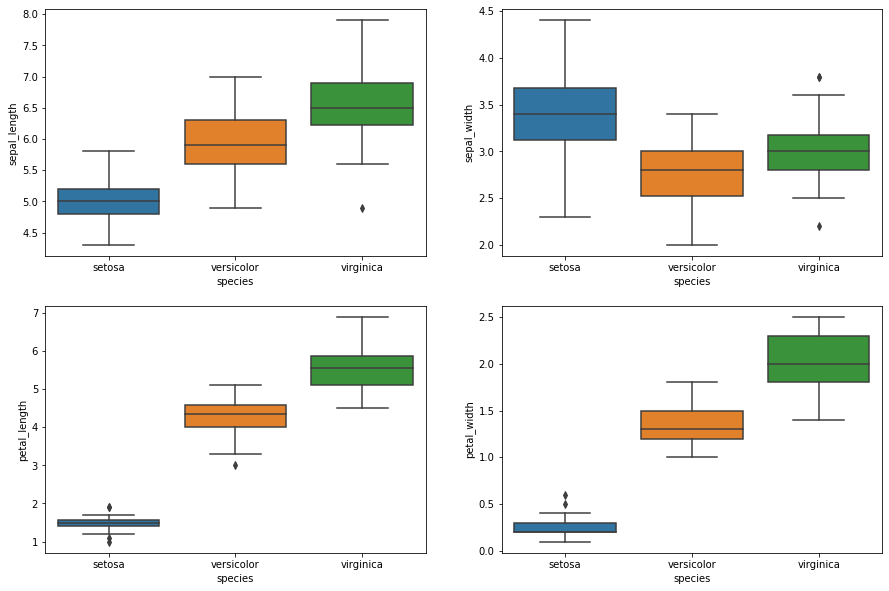

In [206]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=df_iris)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=df_iris)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=df_iris)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=df_iris)

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [207]:
x = df_iris.iloc[:, :-1].values
y = df_iris.iloc[:, -1].values

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [208]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=20)


Lakukan fitur scaling pada variabel X_train dan X_test. 

#Logistic Regression

Bangun model dan ukur accuracy nya

In [209]:
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train,y_train)

c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

Uji model dengan dataset test

In [210]:
y_pred=logreg.predict(x_test)
print(y_pred)

['setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'virginica' 'setosa' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'setosa']


In [211]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cm)
#accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(y_test,y_pred))

Confusion Matrix
 [[5 0 0]
 [0 5 0]
 [0 1 4]]
Accuracy score:  0.9333333333333333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [212]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

Uji hasil model dengan data test

In [213]:
y_pred = gnb.predict(x_test)
print(y_pred)

['setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'virginica' 'setosa' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [214]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cm)
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(y_test,y_pred))

Confusion Matrix
 [[5 0 0]
 [0 5 0]
 [0 1 4]]
Accuracy score:  0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [215]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [216]:
y_pred = knn.predict(x_test)
print(y_pred)

['setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'virginica' 'setosa' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [217]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cm)
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(y_test,y_pred))

Confusion Matrix
 [[5 0 0]
 [0 5 0]
 [0 1 4]]
Accuracy score:  0.9333333333333333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

Dari ketiga model klasifikasi yang digunakan, semua model menghasilkan akurasi yang sama yaitu 93.33%. Dengan demikian, tidak ada model klasifikasi yang lebih baik secara signifikan dalam hal akurasi untuk model iris ini. User dapat memilih salah satu dari ketiga model klasifikasi karena akurasi ketiganya sebanding